### 팔요한 라이브러리 호출

In [210]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import numpy as np
import platform
# 정규식
import re

### 폰트 지정

In [211]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

### 데이터 호출

In [212]:
df_usage = pd.read_csv('전력 사용량 14차.csv')
df_usage = df_usage.drop(columns=['Unnamed: 0'])
df_kospi = pd.read_csv('코스피 2차.csv')
df_kospi = df_kospi.drop(columns=['Unnamed: 0'])
df_usage

,년월,연도,월,시도,사용량
0,2010_1,2010,1,강원도,1480180
1,2010_1,2010,1,경기도,8725482
2,2010_1,2010,1,경상남도,2922775
3,2010_1,2010,1,경상북도,3743904
4,2010_1,2010,1,광주광역시,712924
...,...,...,...,...,...
2443,2021_12,2021,12,전라남도,2966246
2444,2021_12,2021,12,전라북도,1864342
2445,2021_12,2021,12,제주특별자치도,473291
2446,2021_12,2021,12,충청남도,4388778


In [213]:
df_kospi

,년월,연도,월,코스피 평균
0,2010_01,2010,1,1682.16
1,2010_02,2010,2,1598.96
2,2010_03,2010,3,1665.50
3,2010_04,2010,4,1730.29
4,2010_05,2010,5,1648.30
...,...,...,...,...
151,2022_08,2022,8,2479.57
152,2022_09,2022,9,2333.93
153,2022_10,2022,10,2230.27
154,2022_11,2022,11,2417.56


In [214]:
df_usage_test = df_usage.groupby(['년월', '연도', '시도', '월']).sum()
df_usage_test.reset_index()
df_usage_test = df_usage_test.groupby(['연도', '월']).sum()
df_usage_test = df_usage_test.reset_index()
df_usage_test

,연도,월,사용량
0,2010,1,39696747
1,2010,2,37208030
2,2010,3,35554125
3,2010,4,35968361
4,2010,5,33809235
...,...,...,...
139,2021,8,48929956
140,2021,9,44818884
141,2021,10,41838223
142,2021,11,42829617


In [215]:
df_usage

,년월,연도,월,시도,사용량
0,2010_1,2010,1,강원도,1480180
1,2010_1,2010,1,경기도,8725482
2,2010_1,2010,1,경상남도,2922775
3,2010_1,2010,1,경상북도,3743904
4,2010_1,2010,1,광주광역시,712924
...,...,...,...,...,...
2443,2021_12,2021,12,전라남도,2966246
2444,2021_12,2021,12,전라북도,1864342
2445,2021_12,2021,12,제주특별자치도,473291
2446,2021_12,2021,12,충청남도,4388778


In [216]:
# 데이터 호출
df_usage = pd.read_csv('전력 사용량 14차.csv')
df_usage = df_usage.drop(columns=['Unnamed: 0'])

# 입력된 데이터 추출

df_usage = df_usage.groupby(['년월', '연도', '월']).sum().reset_index()

C:\Users\ssh\AppData\Local\Temp\ipykernel_14188\1691335242.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_usage = df_usage.groupby(['년월', '연도', '월']).sum().reset_index()


In [217]:
df_usage_kospi = pd.merge(df_kospi, df_usage_test)

In [218]:
df_usage_kospi

,년월,연도,월,코스피 평균,사용량
0,2010_01,2010,1,1682.16,39696747
1,2010_02,2010,2,1598.96,37208030
2,2010_03,2010,3,1665.50,35554125
3,2010_04,2010,4,1730.29,35968361
4,2010_05,2010,5,1648.30,33809235
...,...,...,...,...,...
139,2021_08,2021,8,3182.50,48929956
140,2021_09,2021,9,3141.70,44818884
141,2021_10,2021,10,2989.87,41838223
142,2021_11,2021,11,2964.30,42829617


In [219]:
def usage_plt(target_year):
    # X축 : 기간, Y축 : 사용량

    # 데이터 호출
    df_usage = pd.read_csv('전력 사용량 14차.csv')
    df_usage = df_usage.drop(columns=['Unnamed: 0'])

    # 입력된 데이터 추출
    label = df_usage[df_usage['연도'] == target_year]
    label= label.groupby(['년월', '연도', '월']).sum().reset_index()

    # 그래프 크기 설정
    plt.figure(figsize=(29, 6))

    # 데이터프레임을 이용하여 그래프 그리기
    plt.plot(label['년월'],label['사용량'], marker='o', markersize=2)


    # y축에 그리드 추가
    plt.grid(axis='y', linestyle='-', alpha=0.5)

    # 그래프 범례를 그래프 밖에 위치
    plt.legend('사용량', loc='center left', bbox_to_anchor=(1, 0.5))

    # 그래프 제목 설정
    plt.title('2010~2021 전력 사용량')

    # x축 레이블 설정
    plt.xlabel('사용 월')

    plt.grid(axis='x', linestyle='-', alpha=0.4)

    # x축 값 조절
    # xticks = df_usage_test[['연도','월']][::6]

    xticks = label['년월']
    plt.xticks(xticks)

    # y축 레이블 설정
    plt.ylabel('전력 사용량')

    # x, y축 범위 자동으로 설정
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)

    # 그래프 출력
    plt.show()

In [220]:
df_usage_kospi['사용량'].to_list()
df_usage_list = list(df_usage_kospi['사용량'])
df_usage_kospi['코스피 평균'].to_list()
df_kospi_list = list(df_usage_kospi['코스피 평균'])
df_usage_kospi['년월'].to_list()
date = list(df_usage_kospi['년월'])

In [221]:
def plot(target_year):

    # 데이터 호출
    df_usage_kospi = pd.read_csv('전력사용량,코스피.csv')




    # 타겟 기간 호출
    df_usage_kospi = df_usage_kospi[df_usage_kospi['연도'] == target_year]



    df_usage_kospi['사용량'].to_list()
    df_usage_list = list(df_usage_kospi['사용량'])
    df_usage_kospi['코스피 평균'].to_list()
    df_kospi_list = list(df_usage_kospi['코스피 평균'])
    df_usage_kospi['년월'].to_list()
    date = list(df_usage_kospi['월'])

    # 그래프 데이터 생성
    x = date
    y1 = df_usage_list
    y2 = df_kospi_list

    # 그래프 객체 생성
    fig, ax = plt.subplots()

    ax.set_title('전력 사용량 VS 코스피')

    # 첫 번째 그래프 그리기
    ax.plot(x, y1, color='red', label='전력 사용량')
    ax.set_ylabel('전력 사용량')
    ax.tick_params('y', colors='red')

    # 두 번째 그래프 그리기
    ax2 = ax.twinx()
    ax2.plot(x, y2, color='blue', label='코스피')
    ax2.set_ylabel('코스피')
    ax2.tick_params('y', colors='blue')

    # 범례 표시
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 그래프 보여주기
    plt.show()

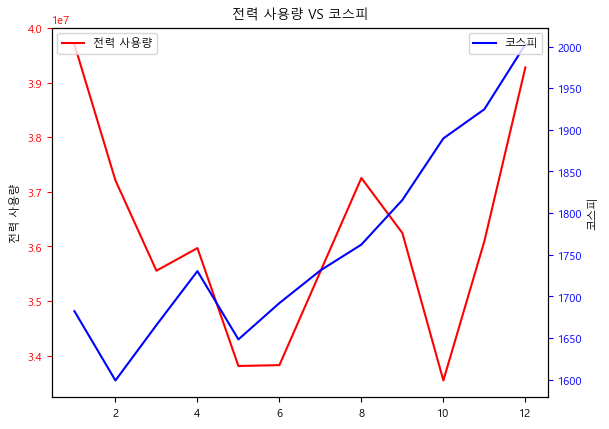

In [222]:
plot(2010)

In [223]:
def usage_kospi_plt(target_year):
    # X축 : 기간, Y축 : 사용량

    # 데이터 호출
    df_usage_kospi = pd.read_csv('전력사용량,코스피.csv')

    # 입력된 데이터 추출
    df_usage_kospi = df_usage_kospi[df_usage_kospi['연도'] == target_year]

    # 그래프 크기 설정
    plt.figure(figsize=(29, 6))

    # 데이터프레임을 이용하여 그래프 그리기
    plt.plot(df_usage_kospi['년월'],df_usage_kospi['사용량'], marker='o', markersize=2)
    plt.plot(df_usage_kospi['년월'], df_usage_kospi['코스피 평균'], marker='o', markersize=2)

    # y축에 그리드 추가
    plt.grid(axis='y', linestyle='-', alpha=0.5)

    # 그래프 범례를 그래프 밖에 위치
    plt.legend('사용량', loc='center left', bbox_to_anchor=(1, 0.5))

    # 그래프 제목 설정
    plt.title('2010~2021 전력 사용량')

    # x축 레이블 설정
    plt.xlabel('사용 월')

    plt.grid(axis='x', linestyle='-', alpha=0.4)

    # x축 값 조절
    # xticks = df_usage_test[['연도','월']][::6]

    xticks = df_usage_kospi['년월']
    plt.xticks(xticks)

    # y축 레이블 설정
    plt.ylabel('사용량, 코스피')

    # x, y축 범위 자동으로 설정
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)

    # 그래프 출력
    plt.show()

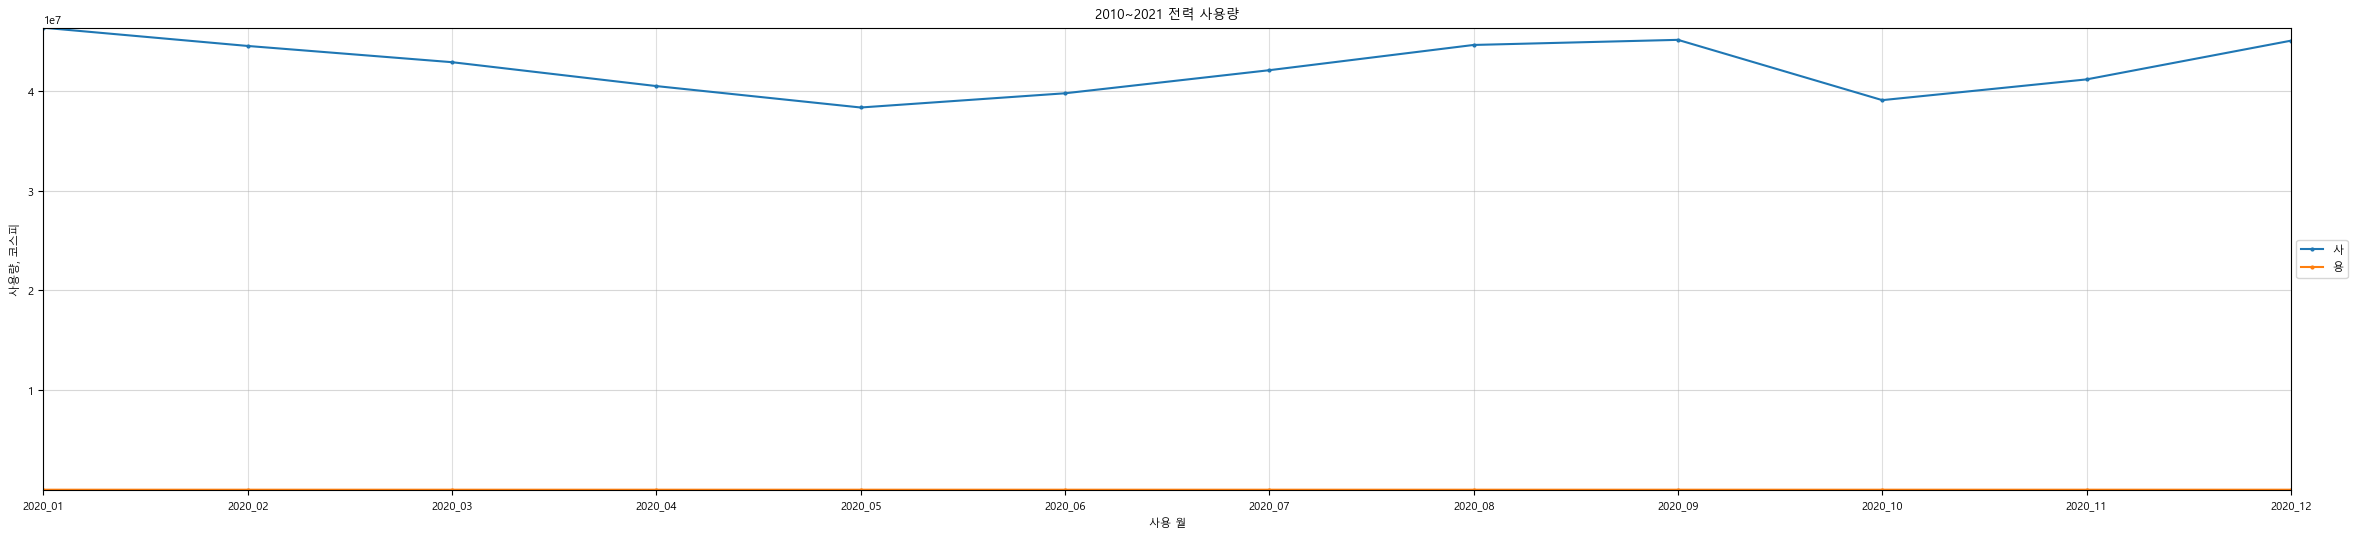

In [224]:
usage_kospi_plt(2020)

In [225]:
def kospi_plt(target_year):
    # X축 : 기간, Y축 : 코스피 평균

    df_kospi = pd.read_csv('코스피 2차.csv')
    df_kospi = df_kospi.drop(columns=['Unnamed: 0'])

    label = df_kospi[df_kospi['연도'] == target_year]

    # 그래프 크기 설정
    plt.figure(figsize=(29, 6))

    # 데이터프레임을 이용하여 그래프 그리기
    plt.plot(label['년월'], label['코스피 평균'], marker='o', markersize=2)



    # y축에 그리드 추가
    plt.grid(axis='y', linestyle='-', alpha=0.5)

    # 그래프 범례를 그래프 밖에 위치
    plt.legend('사용량', loc='center left', bbox_to_anchor=(1, 0.5))

    # 그래프 제목 설정
    plt.title('2010~2021 월별 코스피')

    # x축 레이블 설정
    plt.xlabel('사용 월')

    plt.grid(axis='x', linestyle='-', alpha=0.4)

    # x축 값 조절
    xticks = label['년월']
    plt.xticks(xticks)

    # y축 레이블 설정
    plt.ylabel('코스피')

    # x, y축 범위 자동으로 설정
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)

    # 그래프 출력
    plt.show()

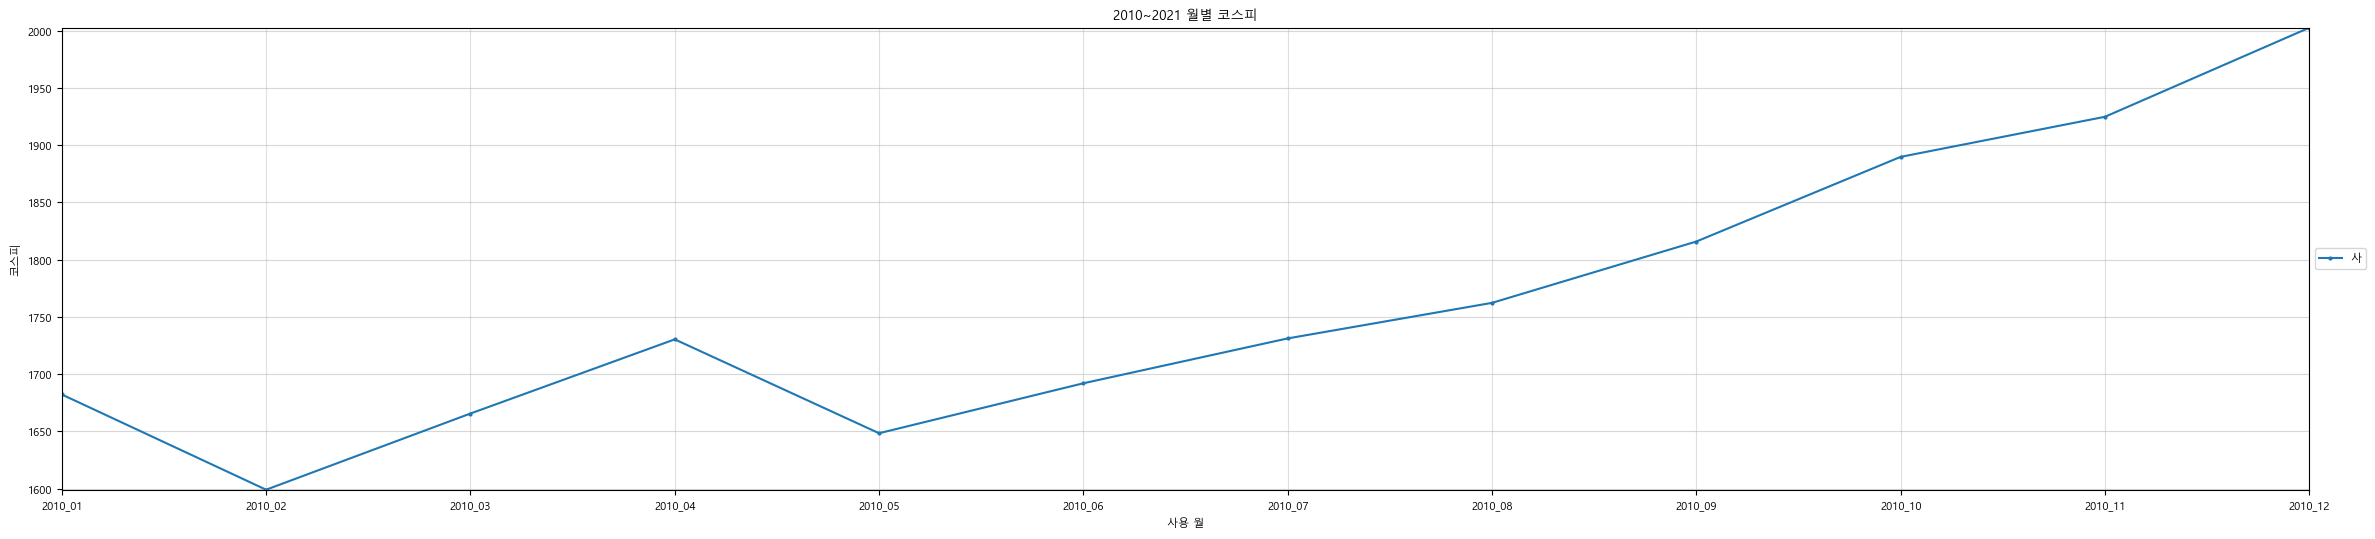

In [226]:
kospi_plt(2010)